In [1]:
# change to `%matplotlib qt5` for interactive methods
%matplotlib qt5

from imgseries import ImgSeries, ContourTracking, ContourTrackingResults

# Define image series to work on

In [2]:
basefolder = Path('data')
folders = [basefolder / folder for folder in ('img1', 'img2')]
images = ImgSeries(folders, savepath=basefolder)

# Minimal analysis

In [3]:
ct = ContourTracking(images)

The line below assumes that contours to follow have already been defined and saved in the metadata file (see details further below)

In [4]:
ct.regenerate()

In [5]:
ct.contours.show()

<AxesSubplot: title={'center': 'img #10, grey level 170'}>

Now, run analysis on these zones.

In [7]:
ct.run()

100%|█████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.15it/s]


Results are stored in the `results.data` attribute, which is a pandas DataFrame (times are automatically extracted from image creation date, but can be modified, see further below)). `x, y` represent position, `p` perimeter and `a` signed area (see **imgbasics** package)

*Note*: if contour detection fails at some point, `data` will contain `NaN` (`numpy.nan`) at the corresponding locations.

*Note*: by default, the full coordinates of the contours are also stored in `results.raw_contour_data`. If this is too heavey, `ContourTracking` can be instanciated with the option `save_raw_contours=False`

In [8]:
ct.results.data.head()

,folder,filename,time (unix),x1,y1,p1,a1,x2,y2,p2,a2,x3,y3,p3,a3
num,,,,,,,,,,,,,,,
0,img1,img-00610.png,1.599832e+09,315.928971,368.440615,53.6358,-221.358537,421.038813,306.105521,38.678836,-115.161729,386.735104,349.568814,49.03888,-185.941675
1,img1,img-00611.png,1.599832e+09,315.896211,368.169124,53.660836,-221.577125,420.704398,305.9656,38.668941,-114.874203,386.513469,349.338689,48.802118,-184.610043
2,img1,img-00612.png,1.599832e+09,315.814959,368.022253,53.536133,-220.643384,420.364499,305.93741,38.620958,-114.408979,386.271897,349.213923,48.664648,-183.858767
3,img1,img-00613.png,1.599832e+09,315.72118,367.772809,53.501544,-219.98769,419.980109,305.837831,38.43881,-113.479844,386.022625,349.011256,48.54708,-182.229981
4,img1,img-00614.png,1.599832e+09,315.650098,367.566705,53.337046,-219.301255,419.641802,305.74682,38.381266,-113.082108,385.769535,348.82847,48.519166,-181.226358


In [9]:
ct.results.raw_contour_data['1']['10']['y'][:10]

[374.1764705882353,
 374.42028985507244,
 374.65,
 374.62264150943395,
 374.6896551724138,
 374.728813559322,
 374.59322033898303,
 374.375,
 374.0,
 373.9375]

In [ ]:
ct.inspect(skip=3)

In [7]:
ct.animate(start=10, end=30)

Plot perimeters of all detected particles (contours) as a function of time:

<AxesSubplot: xlabel='time (unix)'>

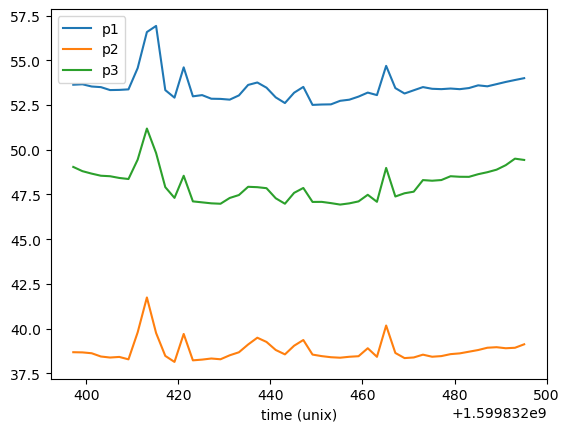

In [11]:
ct.results.data.set_index('time (unix)').filter(like='p').plot()

Save data in a tsv (tab-separated value) file, using default filename (filename can be set as a parameter if necessary, see further below). Metadata including contour info, path info, and code version info is also saved in a .json file at the same time. Full (raw) contour data is also saved if required.

Before saving, make sure the timing info is correct for all images. If not, correct timing info, re-run the analysis, and call `results.save()`.

In [12]:
ct.results.save()

# Live view of analysis

In [15]:
ct.run(end=30, live=True)

It is possible that the live animation is non blocking and thus that data is not saved correctly (saving is done at the beginning of the animation and thus data is empty). If this happens, best is probably to re-run the analysis with live=False.

Check that data is empty:

In [16]:
ct.results.data.set_index('time (unix)').filter(like='p').plot()

<AxesSubplot:xlabel='time (unix)'>

# Defining and viewing contours

Defining contours has to be done at least once.

**Important**: Matplotlib must be in an interactive mode to do so.

Defining does not need to be done again in the following situations:
- calling methods again from the same `ct` object, e.g. `ct.run()`
- calling `ct.contours.load()` or `ct.regenerate()` to load contours data from saved metadata (.json) file.

In [18]:
images.filter.define()  # optional, smoothing of image
# (or images.filter.type = 'gaussian', images.filter.size = 2.2)

In [19]:
ct.threshold.define()

In [9]:
print(images.filter)
print(ct.threshold)

Filter object {'type': 'gaussian', 'size': 3.1}
Threshold object {'value': 158}


In [10]:
ct.contours.define()  # define one contour on the first image of the series

In [11]:
ct.contours.define(n=3)  # define 3 contours on the first image of the series

In [12]:
ct.contours.define(3, num=10)  # define 3 contours at level 170 on image #10 in the series

Viewing analysis zones after defining or loading them:

In [13]:
ct.contours.data

{'position': {'contour 1': (306.41331378617514, 350.03551955924377),
  'contour 2': (377.61132139817175, 342.10466783196057),
  'contour 3': (416.90112097408644, 305.0546047438016)},
 'level': 158,
 'image': 10}

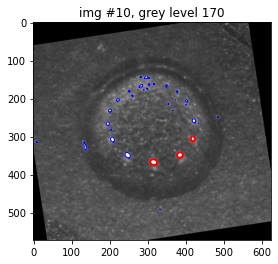

<AxesSubplot:title={'center':'img #10, grey level 170'}>

In [7]:
ct.contours.show()  # show contours on the image they have been defined on

**Note**: At the moment, saving contours selection data is done by calling `ct.save()`, which saves both data and metadata. Be careful because calling `ct.save()` also overwrites saved analysis data (potentially with no data if no analysis has been run yet). This makes sure that metadata in .json files actually corresponds to the data in the .tsv file.

# Load analysis data a posteriori

## Load results without images

In [20]:
results = ContourTrackingResults(savepath=basefolder)

In [21]:
results.load()
results.data.head()

,folder,filename,time (unix),x1,y1,p1,a1,x2,y2,p2,a2,x3,y3,p3,a3
num,,,,,,,,,,,,,,,
0,img1,img-00610.png,1.599832e+09,315.928971,368.440615,53.635800,-221.358537,421.038813,306.105521,38.678836,-115.161729,386.735104,349.568814,49.038880,-185.941675
1,img1,img-00611.png,1.599832e+09,315.896211,368.169124,53.660836,-221.577125,420.704398,305.965600,38.668941,-114.874203,386.513469,349.338689,48.802118,-184.610043
2,img1,img-00612.png,1.599832e+09,315.814959,368.022253,53.536133,-220.643384,420.364499,305.937410,38.620958,-114.408979,386.271897,349.213923,48.664648,-183.858767
3,img1,img-00613.png,1.599832e+09,315.721180,367.772809,53.501544,-219.987690,419.980109,305.837831,38.438810,-113.479844,386.022625,349.011256,48.547080,-182.229981
4,img1,img-00614.png,1.599832e+09,315.650098,367.566705,53.337046,-219.301255,419.641802,305.746820,38.381266,-113.082108,385.769535,348.828470,48.519166,-181.226358


In [22]:
results.metadata

{'path': 'C:\\Users\\olivier.vincent\\Python-OV\\imgseries\\data',
 'folders': ['img1', 'img2'],
 'contours': {'position': {'contour 1': [316.21010649895425,
    367.2207769295529],
   'contour 2': [418.86376471987666, 306.00822566551506],
   'contour 3': [385.30831670041636, 348.5995433315813]},
  'level': 170,
  'image': 10},
 'rotation': {'angle': 8.595911436920964},
 'crop': {'zone': [39, 24, 625, 572]},
 'time (utc)': '2023-01-30 18:47:39',
 'code version': {'skimage': {'status': 'not a git repository',
   'tag': 'v0.17.2'},
  'imgseries': {'hash': 'e30097a0afdf2d7d20fd8f060a1e5a5d107b0bd3',
   'status': 'dirty',
   'tag': 'v0.4.0'},
  'imgbasics': {'hash': '3f468b4021be56679a448bea57a229fc34c6721d',
   'status': 'clean',
   'tag': 'v0.3.0'},
  'filo': {'hash': '150574b5ae82c74d0c500b3fdb494e8f9c7631f7',
   'status': 'clean',
   'tag': 'v1.1.5'},
  'matplotlib': {'status': 'not a git repository', 'tag': 'v3.3.2'},
  'numpy': {'status': 'not a git repository', 'tag': 'v1.19.2'}}}

In [23]:
results.raw_contour_data['2']['33']['x'][:10]

[418.0,
 417.57142857142856,
 417.0,
 416.0,
 415.0,
 414.5925925925926,
 414.0,
 413.7105263157895,
 413.2375,
 413.0]

## Connect results to image series (e.g. for inspection/visualization)

In [8]:
images = ImgSeries(folders, savepath=basefolder)
ct = ContourTracking(images)
ct.regenerate()

In [9]:
print('Image Crop -------------------------', ct.img_series.crop.zone)
print('Image Crop (same as above) ---------', ct.results.metadata['crop']['zone'])
print('')
print('Image Rotation ---------------------', ct.img_series.rotation.data)
print('Image Rotation (same as above) -----', ct.results.metadata['rotation'])
print('')
print('Contour position -------------------', ct.contours.data['position']['contour 2'])
print('Contour position (same as above) ---', ct.results.metadata['contours']['position']['contour 2'])

ct.results.data.head()

Image Crop ------------------------- [39, 24, 625, 572]
Image Crop (same as above) --------- [39, 24, 625, 572]

Image Rotation --------------------- {'angle': 8.595911436920964}
Image Rotation (same as above) ----- {'angle': 8.595911436920964}

Contour position ------------------- [418.86376471987666, 306.00822566551506]
Contour position (same as above) --- [418.86376471987666, 306.00822566551506]


,folder,filename,time (unix),x1,y1,p1,a1,x2,y2,p2,a2,x3,y3,p3,a3
num,,,,,,,,,,,,,,,
0,img1,img-00610.png,1.599832e+09,315.928971,368.440615,53.635800,-221.358537,421.038813,306.105521,38.678836,-115.161729,386.735104,349.568814,49.038880,-185.941675
1,img1,img-00611.png,1.599832e+09,315.896211,368.169124,53.660836,-221.577125,420.704398,305.965600,38.668941,-114.874203,386.513469,349.338689,48.802118,-184.610043
2,img1,img-00612.png,1.599832e+09,315.814959,368.022253,53.536133,-220.643384,420.364499,305.937410,38.620958,-114.408979,386.271897,349.213923,48.664648,-183.858767
3,img1,img-00613.png,1.599832e+09,315.721180,367.772809,53.501544,-219.987690,419.980109,305.837831,38.438810,-113.479844,386.022625,349.011256,48.547080,-182.229981
4,img1,img-00614.png,1.599832e+09,315.650098,367.566705,53.337046,-219.301255,419.641802,305.746820,38.381266,-113.082108,385.769535,348.828470,48.519166,-181.226358


Once the analysis is regenerated, all the tools associated with images (inspection, showing, animation, etc.) are available:

<AxesSubplot:title={'center':'img #25, grey level 170'}>

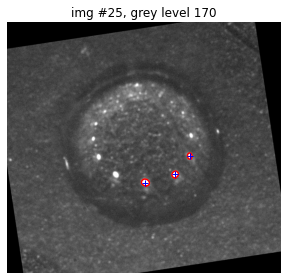

In [10]:
ct.show(num=25)

In [ ]:
ct.inspect()

# Analyze only subset of images

See **Examples_GreyLevels.ipynb**, and replace:
- `GreyLevel` →  `ContourTracking`
- `zones` →  `contours`